In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from graphviz import Digraph

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
sigmoid(3)

np.float64(0.9525741268224334)

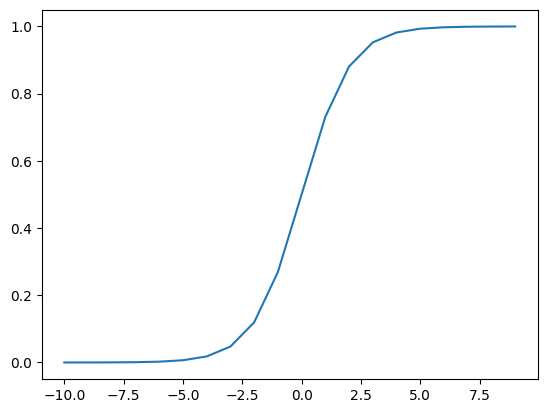

In [4]:
xs = np.arange(-10, 10, 1)
ys = sigmoid(xs)
plt.plot(xs, ys)

In [5]:
h=0.00001
x = 0
d = (sigmoid(x+h) - sigmoid(x)) / h
d

np.float64(0.24999999999053554)

In [56]:
class Value:
    def __init__(self,data, _children=(), _op=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self) -> str:
        return f"Value({self.data})"
    
    def __add__(self, other_value):
        return Value(self.data + other_value.data, (self, other_value), '+')
    
    def __mul__(self, other_value):
        return Value(self.data * other_value.data, (self, other_value), '*')
        

In [72]:
a = Value(2)
b = Value(-3)
c = Value(10)
e = a * b 
d = e + c 
f = Value(-2)
L = d * f

In [84]:
L._prev # (a, b, c)

{Value(-2), Value(4)}

In [85]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [92]:
L.grad = 1.0 # dL/dL = 1
d.grad = f.data # dL/dd = f
f.grad = d.data # dL/df = d
e.grad = f.data # dL/de = dL/df * df/de = d * 1
c.grad = f.data # dL/dc = dL/df * df/dc = d * 1
a.grad = b.data*e.grad # dL/da = dL/de * de/da = e.grad * b
b.grad = a.data*e.grad # dL/db = dL/de * de/db = e.grad * a

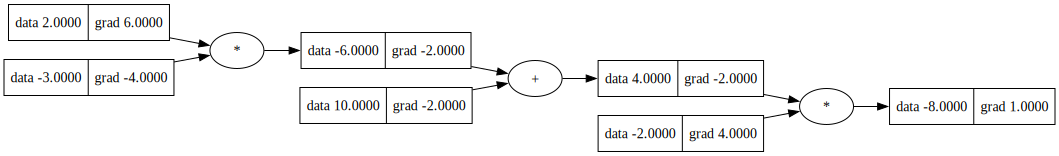

In [93]:
draw_dot(L)

In [94]:
a.data += a.grad * 0.01
b.data += b.grad * 0.01
c.data += c.grad * 0.01
f.data += f.grad * 0.01

e = a * b
d = e + c
L = d * f
L

Value(-7.286496)